In [73]:
#K Means clustering & Linear Regression

In [1]:
#set up kaggle API
!pip install kaggle

     ---------------------------------------- 0.0/82.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/82.1 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/82.1 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/82.1 kB ? eta -:--:--
     -------------- ----------------------- 30.7/82.1 kB 187.9 kB/s eta 0:00:01
     ---------------------------- --------- 61.4/82.1 kB 273.8 kB/s eta 0:00:01
     -------------------------------------  81.9/82.1 kB 353.1 kB/s eta 0:00:01
     -------------------------------------- 82.1/82.1 kB 287.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.14-py3-none-any.whl size=105130 sha256=0afa20769aff0539c330e778b9d3b121069af6e6214c9cbacbac83aeecd740de
  Stored in directory: c:\users\elitebook\appdata\local\pip\cache\wheels\ec\d9\04\93be57edf3835182a8e76d8ff87f7e77a0113f473ba3721ee0
Suc

In [22]:
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

In [4]:
#place the kaggle.json file in a kaggle(new dr) directory your home directory
import json
import os
#make a dir named .Kaggle
os.makedirs(os.path.expanduser('~\.Kaggle'), exist_ok=True)
#save the json file in the ewly created dir
API = {"username":"georginakamau","key":"8a2a6d192e98735ca16e94b16459d4ec"}
with open(os.path.expanduser('~\.Kaggle\kaggle.json'), 'w') as file:   #write mode
    json.dump(API, file)
#change permissions to the file
os.chmod(os.path.expanduser('~\.Kaggle\kaggle.json'), 600) #safeguard your API

In [5]:
#download the dataset
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python
# Unzip the dataset
import zipfile

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other




  0%|          | 0.00/1.55k [00:00<?, ?B/s]
100%|##########| 1.55k/1.55k [00:00<00:00, 17.1kB/s]


In [6]:
with zipfile.ZipFile("customer-segmentation-tutorial-in-python.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

In [7]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")
#random 10 rows
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
69,70,Female,32,48,47
95,96,Male,24,60,52
78,79,Female,23,54,52
104,105,Male,49,62,56
170,171,Male,40,87,13
29,30,Female,23,29,87
134,135,Male,20,73,5
136,137,Female,44,73,7
148,149,Female,34,78,22
147,148,Female,32,77,74


In [9]:
#are there any missing rows
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
#select features in columns
columns = df[['Age','Annual Income (k$)','Spending Score (1-100)']]

#standardize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(columns)

In [19]:
#build KMeans model
from sklearn.cluster import KMeans
#use elbow method to determine number of K clusters
SSE = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters = k, random_state = 0)
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)

C:\Users\elitebook\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\elitebook\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\elitebook\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\elitebook\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setti

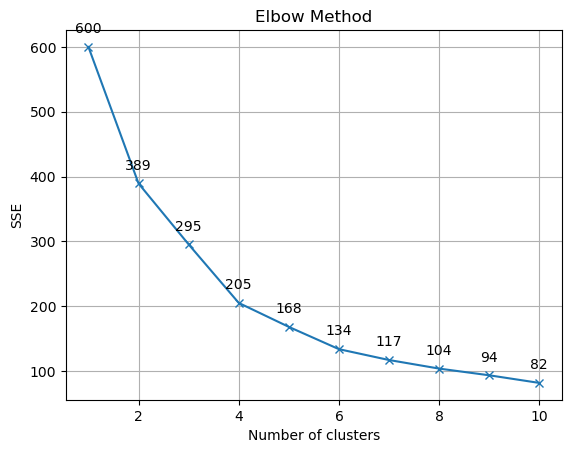

In [21]:
import matplotlib.pyplot as plt
plt.plot(K_range, SSE, marker = 'x')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.grid(True)
# Add data labels
for i, txt in enumerate(SSE):
    plt.annotate(f'{txt:.0f}', (K_range[i], SSE[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.show()

In [39]:
# significant decrease stops at k=4
#Final model with K=4
kmeans = KMeans(n_clusters=4, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_features)

[[32.875      86.1        81.525     ]
 [25.43859649 40.         60.29824561]
 [39.36842105 86.5        19.57894737]
 [53.98461538 47.70769231 39.96923077]]


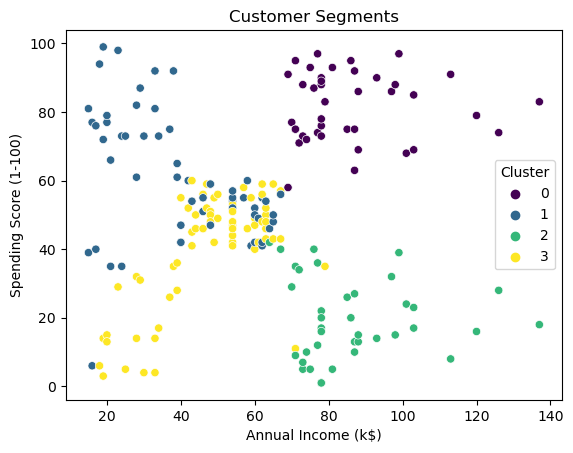

In [40]:
#Model evaluation.
#initialize random centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print(centroids)
# Visualize the clusters
import seaborn as sns

sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.show()
#assign each datapoint to the nearest centroid
#recalculate centroids as the mean of all datapoints assigned to each cluster
#

In [43]:
##Cluster Interpretation
    #0: 'High Income, High Spending',
    #1: 'Low Income, High Spending',
    #2: 'High Income, Low Spending',
    #3: 'Low Income, Low Spending'

In [47]:
#make predictions using new unseen data
# New customer data
new_customers = [[28, 50, 75], [20, 100, 30]]
scaled_new_customers = scaler.transform(new_customers)

# Predict cluster for new data points
predicted_clusters = kmeans.predict(scaled_new_customers)
print(predicted_clusters)

[1 2]


In [48]:
##what about gender
#does gender affect annual income and spending scores


In [49]:
#encode gender column
#0-female
#1-male
from sklearn.preprocessing import LabelEncoder

# Encode Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [72]:
#confirm encoding
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,3
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1


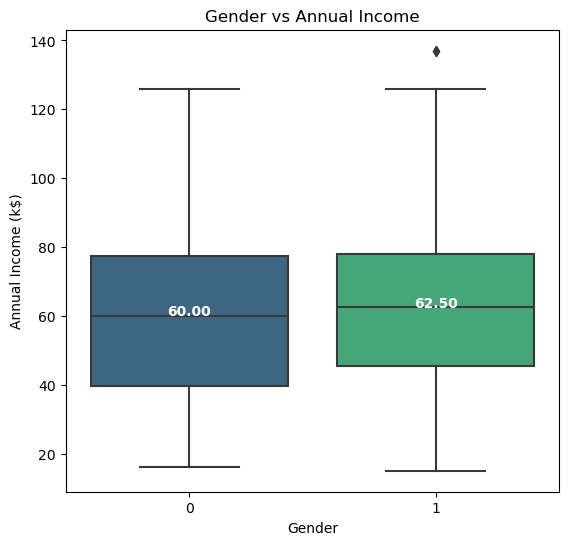

In [52]:
#Visualize correlation with spending scores and annual income
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting Gender vs Annual Income
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df, palette='viridis')
plt.title('Gender vs Annual Income')
# Add data labels for median values
medians1 = df.groupby(['Gender'])['Annual Income (k$)'].median().values
for i, median in enumerate(medians1):
    plt.text(i, median, f'{median:.2f}', horizontalalignment='center', color='white', weight='semibold')

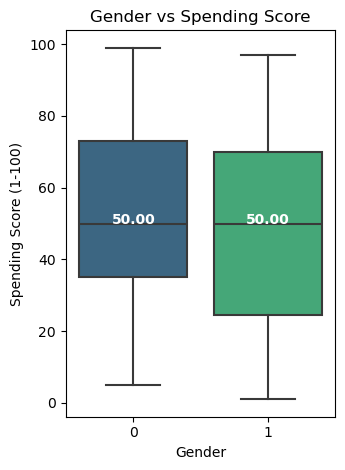

In [53]:
# Plotting Gender vs Spending Score
plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='viridis')
plt.title('Gender vs Spending Score')
# Add data labels for median values
medians2 = df.groupby(['Gender'])['Spending Score (1-100)'].median().values
for i, median in enumerate(medians2):
    plt.text(i, median, f'{median:.2f}', horizontalalignment='center', color='white', weight='semibold')
plt.tight_layout()
plt.show()

In [54]:
#the range of the middle 50% has greater variability in annual incomes of 0 than that of 1 suggested by the longer box
#the range of the middle 50% has greater variability in spending score of 1 than that of 0 suggested by the longer box

In [58]:
# Calculate the correlation matrix
corr_matrix = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
print(corr_matrix)

                          Gender       Age  Annual Income (k$)  \
Gender                  1.000000  0.060867            0.056410   
Age                     0.060867  1.000000           -0.012398   
Annual Income (k$)      0.056410 -0.012398            1.000000   
Spending Score (1-100) -0.058109 -0.327227            0.009903   

                        Spending Score (1-100)  
Gender                               -0.058109  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


In [60]:
#Interpretation (correlation coefficient r)
#(Annual Income & Spending Score r>0; r=0.0099)customers with higher income tend to have higher spending scores
#(Annual Income & Age r<0; r=-0.0124)younger customers may have higher annual income compared to older customers.
#(Spending Score & Age r<0; r=-0.3272)younger customers may have higher spending score compared to older customers.
#(Spending Score & Gender r<0; r=-0.0581)women may have higher spending score compared to men.
#(Annual Income & Gender r<0; r=0.056410)men may have higher Annual Income compared to women.

In [61]:
# Select features including gender
features = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaled_features = scaler.fit_transform(features)

# Calculate SSE for a range of K values with gender included
sse = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

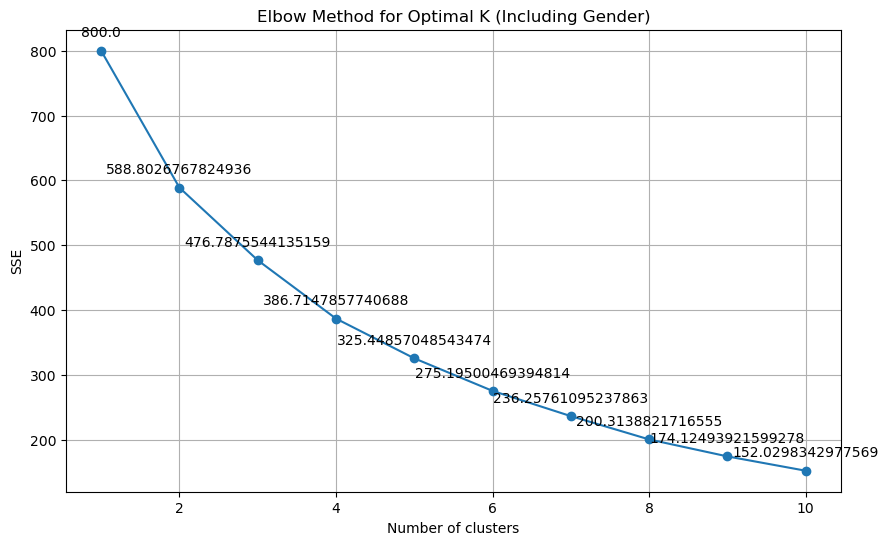

In [62]:
# Plot SSE against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal K (Including Gender)')
plt.grid(True)

# Add data labels
for i, txt in enumerate(sse):
    plt.annotate(f'{txt}', (K_range[i], sse[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

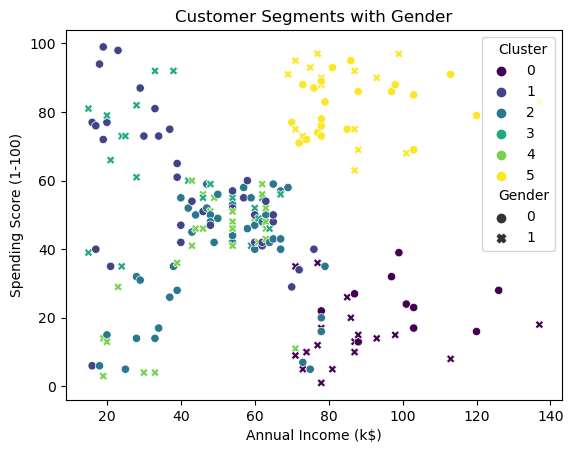

In [70]:
# Final model with K=4 (or another optimal K)
kmeans = KMeans(n_clusters=6, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Scatter plot including gender
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', style='Gender', palette='viridis')
plt.title('Customer Segments with Gender')
plt.show()

In [71]:
#We can conclude that:
#gender doesnt matter in high income individuals regardless of spending habits 
#men of low to medium income typically have low to medium spending habits
#women with low income are more likely to have the highest spending habits

In [74]:
# Function to predict cluster of new unseen data
def predict_cluster(gender, age, annual_income, spending_score):
    user_data = np.array([[gender, age, annual_income, spending_score]])
    scaled_user_data = scaler.transform(user_data)
    cluster = kmeans.predict(scaled_user_data)
    return cluster[0]

In [77]:
# Prompt the user for clustering prediction
import numpy as np
user_gender = input("Enter gender (Male/Female): ")
user_gender_encoded = 0 if user_gender.lower() == 'female' else 1
user_age = int(input("Enter age: "))
user_annual_income = float(input("Enter annual income (k$): "))
user_spending_score = float(input("Enter spending score (1-100): "))

predicted_cluster = predict_cluster(user_gender_encoded, user_age, user_annual_income, user_spending_score)
print(f"The predicted cluster for the user is: {predicted_cluster}")

Enter gender (Male/Female):  female
Enter age:  27
Enter annual income (k$):  78
Enter spending score (1-100):  34


The predicted cluster for the user is: 1


In [76]:
##Create a linear regression modelto predict spending score
from sklearn.linear_model import LinearRegression
import seaborn as sns
# Linear regression model to predict spending score
reg_features = df[['Gender', 'Age', 'Annual Income (k$)']]
reg_target = df['Spending Score (1-100)']
reg_model = LinearRegression()
reg_model.fit(reg_features, reg_target)

LinearRegression()

In [78]:
# Function to predict spending score
def predict_spending_score(gender, age, annual_income):
    user_data = np.array([[gender, age, annual_income]])
    spending_score = reg_model.predict(user_data)
    return spending_score[0]

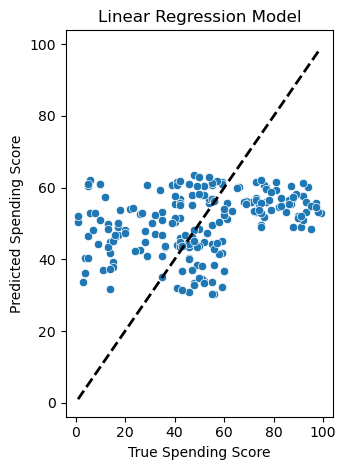

In [80]:
# Plot the regression model
plt.subplot(1, 2, 2)
sns.scatterplot(x=reg_target, y=reg_model.predict(reg_features))
plt.plot([reg_target.min(), reg_target.max()], [reg_target.min(), reg_target.max()], 'k--', lw=2)
plt.xlabel('True Spending Score')
plt.ylabel('Predicted Spending Score')
plt.title('Linear Regression Model')

plt.tight_layout()
plt.show()

In [81]:
#the relationship between the independent(gender, age, annual income) and dependent(dpending scores) variables are properly captured
#the model looks relatively accurate

In [79]:
# Prompt the user for spending score prediction
user_gender = input("Enter gender (Male/Female): ")
user_gender_encoded = 0 if user_gender.lower() == 'female' else 1
user_age = int(input("Enter age: "))
user_annual_income = float(input("Enter annual income (k$): "))

predicted_spending_score = predict_spending_score(user_gender_encoded, user_age, user_annual_income)
print(f"The predicted spending score for the user is: {predicted_spending_score:.2f}")

Enter gender (Male/Female):  Male
Enter age:  13
Enter annual income (k$):  20


The predicted spending score for the user is: 64.27


In [85]:
#measure accuracy of K means clustering model
from sklearn.metrics import silhouette_score

# Compute inertia --sum of squared distances of samples to their closest cluster center
inertia = kmeans.inertia_

# Compute silhouette score --
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)

print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette_avg:.2f}")


Inertia: 275.20
Silhouette Score: 0.32


In [84]:
#measure accuracy of linear regression model
from sklearn.metrics import r2_score, mean_squared_error
predicted_spending_scores = reg_model.predict(reg_features)

# Compute R^2 score --variance in the dependent variable that is predictable from the independent variables(0<=R^2<=1)
r2 = r2_score(reg_target, predicted_spending_scores)

# Compute MSE --average squared difference between the predicted and actual values(the lower the better)
mse = mean_squared_error(reg_target, predicted_spending_scores)

# Compute RMSE --squareroot of MSE
rmse = np.sqrt(mse)

print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


R-squared: 0.11
Mean Squared Error (MSE): 591.46
Root Mean Squared Error (RMSE): 24.32
